In [259]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [260]:
df = pd.read_csv("C:/Users/DhanD/Downloads/portland-oregon-average-monthly-.csv")

In [261]:
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [262]:
df.tail()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,Portland Oregon average monthly bus ridership ...,n=114


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   Month                                                                                       115 non-null    object
 1   Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114  115 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [264]:
df.columns = ["month", "average_monthly_ridership"]
df.head()

,month,average_monthly_ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [265]:
df['average_monthly_ridership'].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327', ' n=114'], dtype=object)

In [266]:
df = df.iloc[:-1 , :]

In [267]:
df['month'] = pd.to_datetime(df['month'])

In [268]:
df['average_monthly_ridership'] = df['average_monthly_ridership'].astype(np.int32)

In [269]:
#df['month'] = pd.to_datetime(df['month'])

In [270]:
#df = df.drop(df.index[df['average_monthly_ridership'] == ' n=114'])

In [271]:
#df['average_monthly_ridership'] = df['average_monthly_ridership'].astype(np.int32)

In [272]:
df = df.set_index('month')

In [273]:
df.dtypes

average_monthly_ridership    int32
dtype: object

In [274]:
df

,average_monthly_ridership
month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630
...,...
1969-02-01,1425
1969-03-01,1419
1969-04-01,1432


### Trend Analysis

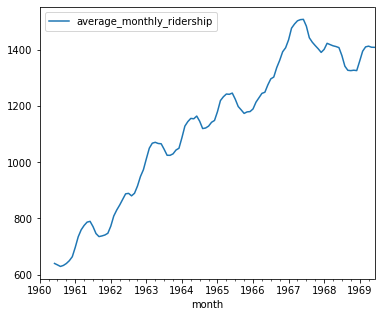

In [277]:
rider = df[['average_monthly_ridership']]

rider.rolling(6).mean().plot(figsize=(6,5),  fontsize=10)
plt.show()

### Time series Analysis

In [279]:
ts = df["average_monthly_ridership"] 
ts.head(10)

month
1960-01-01    648
1960-02-01    646
1960-03-01    639
1960-04-01    654
1960-05-01    630
1960-06-01    622
1960-07-01    617
1960-08-01    613
1960-09-01    661
1960-10-01    695
Name: average_monthly_ridership, dtype: int32

### Seasonability Analysis

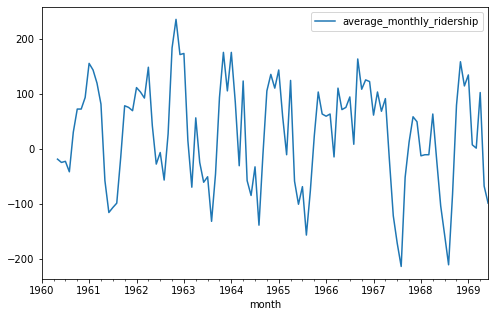

In [280]:
rider.diff(periods=4).plot(figsize=(8,5),  fontsize=10)
plt.show()

### Auto corelation 

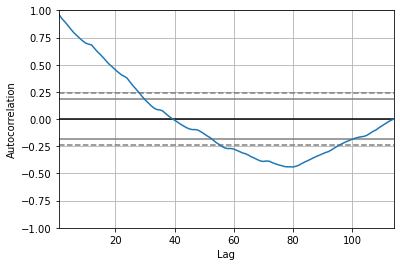

In [281]:
#Auto correlation is the most famous way to understand seasonal variation till now. We can calculate the correlation for 
#time series observations with observations with previous time steps, called lags. 

pd.plotting.autocorrelation_plot(df['average_monthly_ridership'])
plt.show()


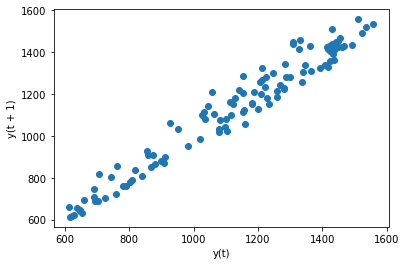

In [282]:
# curve shows the relation between current time step and its previous time step
pd.plotting.lag_plot(df['average_monthly_ridership'])
plt.show()

## Stationary check

### Dickey Fuller Test


In [285]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(8,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

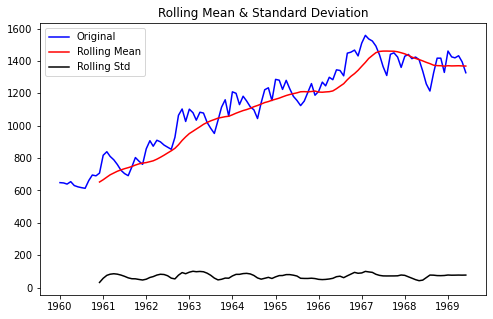

Results of Dickey-Fuller Test:
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [286]:
test_stationarity(ts)

### Using Log to get stationarity

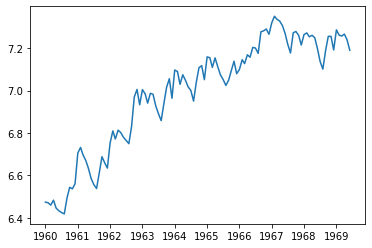

In [288]:
ts_log = np.log(ts)
plt.plot(ts_log)

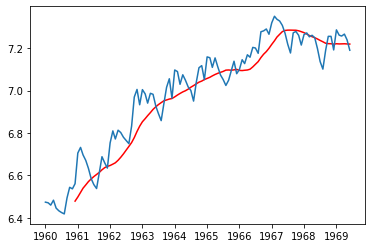

In [289]:
ts_smooth = ts_log.rolling(window = 12).mean()
plt.plot(ts_smooth, color = 'red')
plt.plot(ts_log)
plt.show()

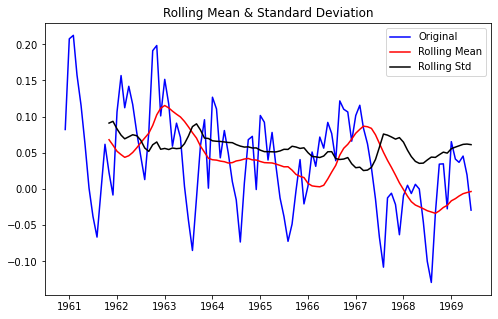

Results of Dickey-Fuller Test:
Test Statistic                 -2.579211
p-value                         0.097371
#Lags Used                     12.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


In [290]:
#case1 

sub_ts = ts_log - ts_smooth
sub_ts.dropna(inplace = True)
test_stationarity(sub_ts)



### Differencing


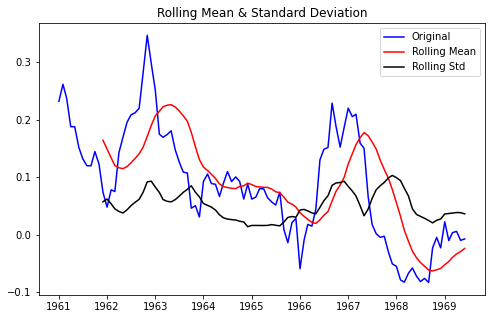

Results of Dickey-Fuller Test:
Test Statistic                  -1.919681
p-value                          0.322860
#Lags Used                       0.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [291]:

ts_diff = ts_log - ts_log.shift(12)
ts_diff.dropna(inplace = True)
test_stationarity(ts_diff)



## Decomposition

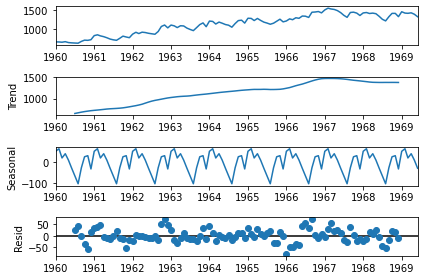

In [293]:
from statsmodels.tsa.seasonal import seasonal_decompose

test = seasonal_decompose(df)

test.plot()

plt.show()

## Forecasting 

### ARIMA Model 

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


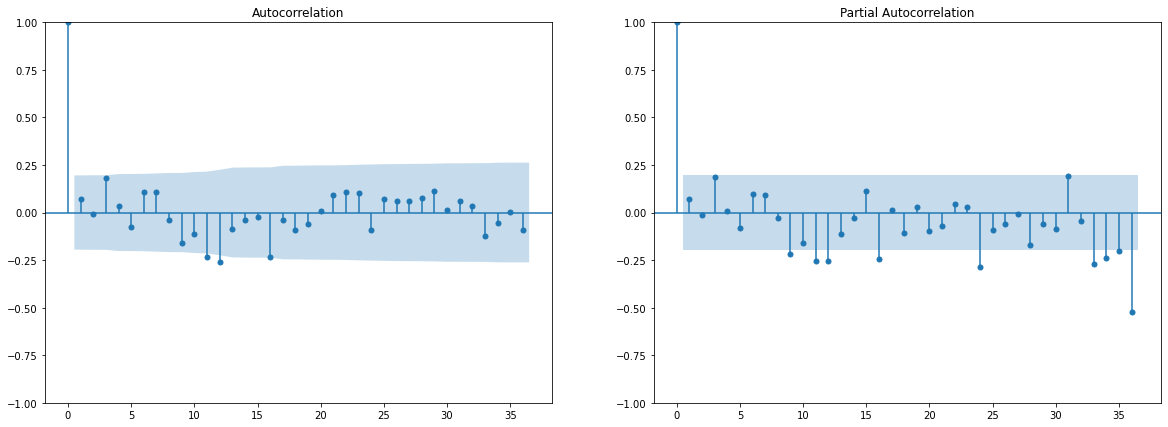

In [307]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(df_2, lags = 36, ax=ax1)
plot_pacf(df_2, lags = 36, ax=ax2)
plt.show()



In [308]:
# Applying Seasonal ARIMA model to forcast the data
mod = sm.tsa.SARIMAX(df['average_monthly_ridership'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:            average_monthly_ridership   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -501.340
Date:                              Tue, 19 Jul 2022   AIC                           1008.680
Time:                                      21:36:27   BIC                           1016.526
Sample:                                  01-01-1960   HQIC                          1011.856
                                       - 06-01-1969                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3236      0.186      1.739      0.082      -0.041       0.688
ma.S.L12      -0.99

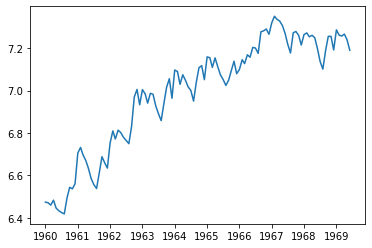

In [309]:
ts_log = np.log(ts)
plt.plot(ts_log)

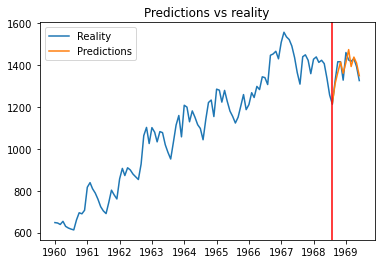

In [311]:


import datetime

pred = results.predict(103, 113)

plt.plot(df, label = 'Reality')
plt.plot(pred, label = 'Predictions')

plt.title('Predictions vs reality')

plt.legend()

plt.axvline(x= datetime.date(1968,8,1), color='red');



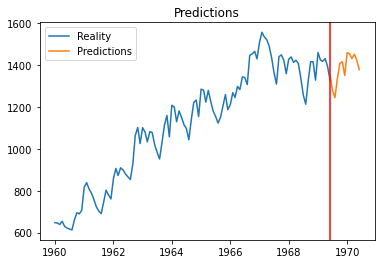

In [312]:


pred = results.predict(113, 125)

plt.plot(df, label = 'Reality')
plt.plot(pred, label = 'Predictions')

plt.title('Predictions')

plt.legend()

plt.axvline(x= datetime.date(1969,6,1), color='red');

